# TEXT SUMMARIZATION  

# by ---  "AD ACADEMY" - AI for Aam Janta

Mentor - Dr Ayan Debnath, IIT Delhi + Harvard university Alumni

LinkedIn: [dr_ayan_debnath](https://www.linkedin.com/in/ayan-debnath/)

YouTube:[AD ACADEMY AI](https://www.youtube.com/@ad_academy)

Topic: TEXT SUMMARIZATION - using Hugging Face's open source LLM

class on 26th February 2024

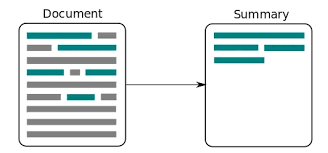

# Steps:



1.   Importing Hugging Face library
2.   Using / build Pipeline to call LLM
3.   Summarize text







In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
summarizer_model = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
text = """
The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris.
Its base is square, measuring 125 metres (410 ft) on each side.
During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York City was finished in 1930.
It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct.
"""

In [ ]:
summarized_text = summarizer_model(text, max_length = 130, min_length = 30, do_sample = False)

In [ ]:
summarized_text

[{'summary_text': ' The Eiffel Tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building . It is now taller than the Chrysler Building by 5.2 metres (17 ft) Excluding transmitters, it is the second tallest free-standing structure in France .'}]

In [ ]:
len(text.split())

130

In [ ]:
len(summarized_text[0]['summary_text'].split())

43

In [ ]:
# call pipeline with model name
summarizer_model = pipeline("summarization", model = 'facebook/bart-large-cnn')

# Text Summarization using a PDF file

### need to read the text content from the PDF file first and then pass that text to the summarizer model.

### Steps



1.   Install necessary libraries: transformers for summarization, PyPDF2 for reading PDF files, and optionally reportlab for creating a sample PDF.
2.   Read the text from the PDF file.
3.   Summarize the extracted text.






In [ ]:
# Install necessary libraries
!pip install transformers
from transformers import pipeline
!pip install PyPDF2
!pip install --upgrade PyPDF2
from PyPDF2 import PdfReader

In [ ]:
# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    pdf_text = ""   # An empty string pdf_text is initialized to store the extracted text from the PDF.
    with open(pdf_path, "rb") as file:
        reader = PdfReader(file)  # Create a PdfReader Object
        for page in reader.pages:
            pdf_text += page.extract_text()
    return pdf_text

# Path to the PDF file
pdf_path = "/content/sample_data/Sachin Tendulkar.pdf"
# pdf_path = "your_pdf_file.pdf"

# Extract text from the PDF
text = extract_text_from_pdf(pdf_path)


pdf_text = ""   # An empty string pdf_text is initialized to store the extracted text from the PDF.

PdfReader(file) --> A PdfReader object is created by passing the file object (file). The PdfReader class from the PyPDF2 library is used to read the content of the PDF file.


for page in reader.pages -->
This line starts a loop that iterates through each page in the PDF. The reader.pages attribute is a list of pages in the PDF.pdf_text = ""   # An empty string pdf_text is initialized to store the extracted text from the PDF.



For each page, the extract_text method is called to extract the text content from the page. The extracted text is then concatenated to the pdf_text string.


## Summary:
The extract_text_from_pdf function reads a PDF file from the specified path, extracts text from each page, and returns the combined text. It:

1. Opens the PDF file in binary read mode.

2. Creates a PdfReader object to read the PDF.

3. Iterates through each page in the PDF.

4. Extracts text from each page using the extract_text method.

5. Concatenates the extracted text to a single string.

6. Returns the concatenated text.


In [ ]:
# Initialize the summarization pipeline
summarizer_model = pipeline("summarization")
# Summarize the extracted text
summarized_text = summarizer_model(text, max_length=130, min_length=30, do_sample=False)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# Print the summarized text
print(summarized_text[0]['summary_text'])

 Sachin Tendulkar is regarded as one of the greatest cricketers of all time . His cricketing career spanned 24 years, during which he achieved numerous records and accolades . Sachin made his debut for Mumbai in domestic cricket at the age of 15 . He became the youngest Indian to score a century on his debut in the Ranji Trophy .


In [ ]:
len(text.split())

154

In [ ]:
len(summarized_text[0]['summary_text'].split())

61

to perform text summarization using the Pegasus model (provided by the transformers library) with the PaliGemma model, you can use the following code. However, note that there is no model named PaliGemma in the Hugging Face transformers library as of now.

Assuming you meant the Pegasus model for summarization, here's how you can do it:

Install the necessary libraries.
Use the Pegasus model for text summarization.

In [ ]:
# Install necessary libraries
!pip install transformers
!pip install PyPDF2

from transformers import PegasusTokenizer, PegasusForConditionalGeneration
import torch
import PyPDF2

# Load the Pegasus model and tokenizer
model_name = "google/pegasus-xsum"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    pdf_text = ""
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfFileReader(file)
        for page_num in range(reader.numPages):
            page = reader.getPage(page_num)
            pdf_text += page.extractText()
    return pdf_text

# Path to the PDF file
pdf_path = "your_pdf_file.pdf"

# Extract text from the PDF
text = extract_text_from_pdf(pdf_path)

# Tokenize the text
tokens = tokenizer(text, truncation=True, padding="longest", return_tensors="pt")

# Generate summary (assuming your text isn't too long; otherwise, you'll need to chunk it)
summary_ids = model.generate(tokens["input_ids"], max_length=130, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the summarized text
print(summary)


## Explanation:

Install necessary libraries: Make sure you have transformers and PyPDF2 installed.
Load the Pegasus model and tokenizer: The Pegasus model and tokenizer are loaded from the transformers library.
Extract text from the PDF: Use the extract_text_from_pdf function to extract text from the PDF.
Tokenize the text: The extracted text is tokenized using the Pegasus tokenizer.
Generate summary: The tokenized text is passed to the Pegasus model to generate a summary.
Print the summarized text: The summary is decoded and printed.

## Note:

Ensure your PDF file path is correct by replacing "your_pdf_file.pdf" with the path to your actual PDF file.
This example assumes that the text is not too long to fit into the model's maximum input length. If your text is very long, you may need to split it into smaller chunks and summarize each chunk separately.

# Speech-to-text

In [ ]:
!pip install transformers torchaudio
import torchaudio
from transformers import WhisperProcessor, WhisperForConditionalGeneration


In [ ]:
# Load the Whisper model and processor
model_name = "openai/whisper-large"
processor = WhisperProcessor.from_pretrained(model_name)
model = WhisperForConditionalGeneration.from_pretrained(model_name)

# Function to load and process audio file
def load_audio(audio_path):
    speech_array, sampling_rate = torchaudio.load(audio_path)
    return speech_array, sampling_rate

# Convert speech to text
def speech_to_text(audio_path):
    speech_array, sampling_rate = load_audio(audio_path)
    inputs = processor(speech_array, sampling_rate=sampling_rate, return_tensors="pt")
    generated_ids = model.generate(inputs.input_features)
    transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)
    return transcription[0]

# Path to the audio file
# audio_path = "your_audio_file.wav"
# audio_path = "/content/sample_data/output_16000Hz.wav"
audio_path = "/content/drive/MyDrive/Video/output_16000Hz.wav"



preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.17G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.85k [00:00<?, ?B/s]

In [ ]:
# Print the transcription
print(transcription)

I also offered your brother help to escape


In [ ]:
!pip install pydub torchaudio
import torchaudio
import torchaudio.transforms as transforms
from pydub import AudioSegment

def convert_flac_to_wav(flac_path, wav_path):
    # Load FLAC file using pydub
    audio = AudioSegment.from_file(flac_path, format="flac")

    # Export audio to WAV format
    audio.export(wav_path, format="wav")

def resample_wav(input_wav_path, output_wav_path, target_sample_rate=16000):
    # Load WAV file using torchaudio
    waveform, sample_rate = torchaudio.load(input_wav_path)

    # Resample to target sample rate
    resampler = transforms.Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
    resampled_waveform = resampler(waveform)

    # Save resampled WAV file
    torchaudio.save(output_wav_path, resampled_waveform, target_sample_rate)

# Paths to the input FLAC file and the temporary WAV file
# flac_path =  "/content/sample_data/1272-135031-0006.flac"   # "input.flac"
flac_path =  "/content/drive/MyDrive/Video/1272-135031-0006.flac"  # "input.flac"
temp_wav_path = "/content/drive/MyDrive/Video/temp.wav"
output_wav_path = "/content/drive/MyDrive/Video/output_16000Hz.wav"

# Convert FLAC to WAV
convert_flac_to_wav(flac_path, temp_wav_path)

# Resample the WAV file to 16000Hz
resample_wav(temp_wav_path, output_wav_path)

print(f"Converted and resampled audio saved to {output_wav_path}")


Converted and resampled audio saved to /content/drive/MyDrive/Video/output_16000Hz.wav


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Transcription:  I also offered to help your brother to escape, but he would not go.
